In [156]:
import numpy as np
import pandas as pd                                                                                                                                                                                                                                                                                                                                        
import cv2
import matplotlib.pyplot as plt
import warnings                                                                                                                                                                                                         
warnings.filterwarnings("ignore")                                                                                                               
import spectral.io.envi as envi
import spectral as spy                                                                                                                                                                                                                                                                                                                                                                                                      
from spectral import open_image
import os                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
from math import floor
import tensorflow

In [157]:
from tensorflow import keras

In [158]:
import splitfolders
input_path = 'Keras_ds/'
output_path = 'Keras_ds_processed/'
splitfolders.ratio(input_path, output_path, seed=42, ratio = (.7, .15, .15))

Copying files: 4843 files [00:01, 3465.94 files/s]


In [159]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='Keras_ds_processed/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size = 32,
    image_size=(100, 100))

val_ds = keras.utils.image_dataset_from_directory(
    directory='Keras_ds_processed/val/',
    labels='inferred',
    label_mode='categorical',
    batch_size = 32,
    image_size=(100, 100))

train_ds = keras.utils.image_dataset_from_directory(
    directory='Keras_ds_processed/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size = 32,
    image_size=(100, 100))

Found 735 files belonging to 10 classes.
Found 721 files belonging to 10 classes.
Found 3387 files belonging to 10 classes.


In [160]:
for data, labels in train_ds:
   print(data.shape)  # (64, 200, 200, 3)
   print(data.dtype)  # float32
   print(labels.shape)  # (64,)
   print(labels.dtype) 

2023-04-18 17:00:17.253073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3387]
	 [[{{node Placeholder/_4}}]]
2023-04-18 17:00:17.253430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3387]
	 [[{{node Placeholder/_0}}]]


(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype: 'float32'>
(32, 10)
<dtype: 'float32'>
(32, 100, 100, 3)
<dtype:

In [161]:
from keras import layers

In [162]:
dense = keras.layers.Dense(units=16)
inputs = keras.Input(shape=(None, None, 3))


x = layers.Rescaling(scale=1.0 / 255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)

x = layers.GlobalAveragePooling2D()(x)

num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax")(x)

In [163]:
model = keras.Model(inputs=inputs, outputs=outputs)
train_ds.map(model)

<_MapDataset element_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)>

In [164]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 rescaling_5 (Rescaling)     (None, None, None, 3)     0         
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                       

In [165]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy())
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
history = model.fit(train_ds, epochs=100, validation_data=val_ds)


Epoch 1/100


2023-04-18 17:00:48.101422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - ETA: 0s - loss: 2.0813

2023-04-18 17:00:51.658849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [721]
	 [[{{node Placeholder/_4}}]]
2023-04-18 17:00:51.659110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [721]
	 [[{{node Placeholder/_4}}]]
2023-04-18 17:00:51.703976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 4s 34ms/step - loss: 2.0813 - val_loss: 1.9716
Epoch 2/100
106/106 [==============================] - 3s 28ms/step - loss: 1.8921 - val_loss: 1.8352
Epoch 3/100
106/106 [==============================] - 3s 27ms/step - loss: 1.8210 - val_loss: 1.8667
Epoch 4/100
106/106 [==============================] - 3s 25ms/step - loss: 1.7743 - val_loss: 1.7672
Epoch 5/100
106/106 [==============================] - 3s 25ms/step - loss: 1.7337 - val_loss: 1.7010
Epoch 6/100
106/106 [==============================] - 3s 26ms/step - loss: 1.6964 - val_loss: 1.6617
Epoch 7/100
106/106 [==============================] - 3s 26ms/step - loss: 1.6724 - val_loss: 1.6404
Epoch 8/100
106/106 [==============================] - 3s 27ms/step - loss: 1.6328 - val_loss: 1.6227
Epoch 9/100
106/106 [==============================] - 3s 25ms/step - loss: 1.5987 - val_loss: 1.6732
Epoch 10/100
106/106 [==============================] - 3s 26ms/step - loss: 1.5697 - val_loss

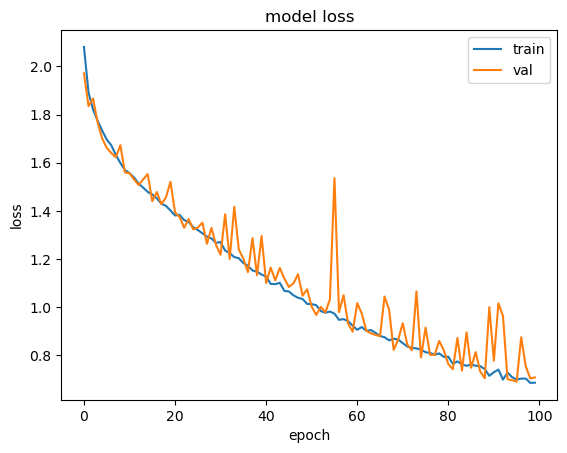

In [169]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [173]:
im_batch, label_batch = next(iter(test_ds))
pred = model.predict(im_batch)
pred.shape

1/1 [==============================] - 0s 22ms/step


(32, 10)

In [174]:
from keras import backend as K
from datetime import date, datetime
from tensorflow import get_static_value as getv


def roc_auc(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return precision*recall

def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall

def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 

today = date.today()
time = datetime.now()
time = time.strftime("%H:%M:%S")
filename = f"tested_architectures/{today}_{time}.txt"
f = open(filename, "w")

print(type(roc_auc))
roc_auc_ = "ROC-AUC: "+str(getv(roc_auc(label_batch, pred)))
recall = "Recall: "+str(getv(recall_m(label_batch, pred)))
precision = "Precision: "+str(getv(precision_m(label_batch, pred)))

print(roc_auc_)
print(recall)
print(precision)

f.write(roc_auc_)
f.write(recall)
f.write(precision)

with open(filename, 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

f.close()


<class 'function'>
ROC-AUC: 0.4310345
Recall: 0.625
Precision: 0.6896552


In [175]:
pd.DataFrame(np.round(pred))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [176]:
pd.DataFrame(label_batch)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
